In [3]:
import os
from sqlalchemy import create_engine
import pandas as pd
from dotenv import load_dotenv
from bs4 import BeautifulSoup
import requests

req = requests.get('https://vaz.io/tesla') # whole html

# get all tables from html
soup = BeautifulSoup(req.text)
all_tables = soup.find_all("table")
len(all_tables)


6

In [6]:
# we can't read the format of all_tables[1]text
# find the table with quarterly
table_number = 0

for table in all_tables:
    if 'Quarterly' in table.text:
        print("It is in", table_number)
        quarterly_number = table_number
    else: 
        print("it si NOT in", table_number)
    table_number = table_number + 1


it si NOT in 0
It is in 1
it si NOT in 2
it si NOT in 3
it si NOT in 4
it si NOT in 5


In [7]:
quarterly_number

1

In [8]:
quarterly_table = all_tables[quarterly_number]

quarterly_rows = quarterly_table.findAll('tr')
len(quarterly_rows)

60

In [38]:
# store data in the dataframe
new_table = []

# find alla data from the rows

for row in quarterly_rows:
    tds = row.findAll('td')
    if len(tds) == 2: # 2 is the numbers of the tds in the row. The first row for example is empty, we do not want it
        # print cell content , first the date one and then the dollar one (0 is index from tds and not from the rows! 0, 1 are index within the tds 2 elements)
       # print(tds[0].text, tds[1].text)
        if tds[1].text != '':
        # print(tds[0].text, float(tds[1].text.replace('$', '').replace(',', '.')))
            row_date = tds[0].text
            row_value = float(tds[1].text.replace('$', '').replace(',', '.')) # cleaned and converted to number
            new_table.append([row_date, row_value])
    

print(new_table)



[['2023-12-31', 25.167], ['2023-09-30', 23.35], ['2023-06-30', 24.927], ['2023-03-31', 23.329], ['2022-12-31', 24.318], ['2022-09-30', 21.454], ['2022-06-30', 16.934], ['2022-03-31', 18.756], ['2021-12-31', 17.719], ['2021-09-30', 13.757], ['2021-06-30', 11.958], ['2021-03-31', 10.389], ['2020-12-31', 10.744], ['2020-09-30', 8.771], ['2020-06-30', 6.036], ['2020-03-31', 5.985], ['2019-12-31', 7.384], ['2019-09-30', 6.303], ['2019-06-30', 6.35], ['2019-03-31', 4.541], ['2018-12-31', 7.226], ['2018-09-30', 6.824], ['2018-06-30', 4.002], ['2018-03-31', 3.409], ['2017-12-31', 3.288], ['2017-09-30', 2.985], ['2017-06-30', 2.79], ['2017-03-31', 2.696], ['2016-12-31', 2.285], ['2016-09-30', 2.298], ['2016-06-30', 1.27], ['2016-03-31', 1.147], ['2015-12-31', 1.214], ['2015-09-30', 937.0], ['2015-06-30', 955.0], ['2015-03-31', 940.0], ['2014-12-31', 957.0], ['2014-09-30', 852.0], ['2014-06-30', 769.0], ['2014-03-31', 621.0], ['2013-12-31', 615.0], ['2013-09-30', 431.0], ['2013-06-30', 405.0], [

In [39]:
number_ex = '$25,1'
real_number = float(number_ex.replace('$', '').replace(',', '.'))
print(real_number)

25.1


<Axes: >

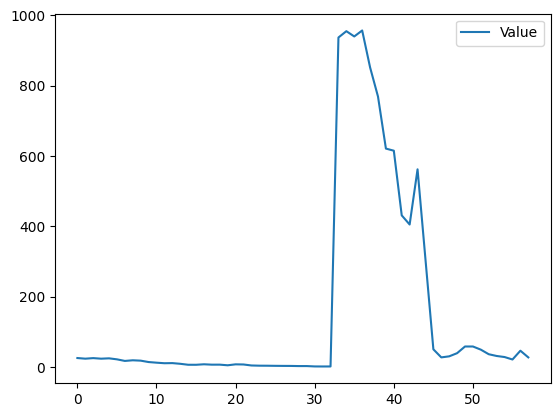

In [40]:
df_table = pd.DataFrame(new_table)
df_table.columns = ["Date", "Value"]
df_table.plot()